In [2]:
import pandas as pd
import os
from datetime import datetime
from dataretrieval import nwis
import matplotlib.pyplot as plt

c:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\RIPHAWK\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### In this note book we will:
- Extract the flow at the nearest USGS gage from the date of each flowtracker measurement
- Get the proportion of our measured flow to the flow at the USGS gage at the same time
- Apply that proportion to the time period we want to model, to adjust boundary and tributary flows.

In [4]:
#reading in data with relative paths so that it can be used by others who clone repository from github
script_dir = os.getcwd()

#flowtracker Observations
flowtracker_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'observations','FlowTrackerObs', 'FlowtrackerMaster2023.csv'))


#read flowtracker data
flowtracker = pd.read_csv(flowtracker_path)
flowtracker.index = flowtracker['Name']
flowtracker

,Name,Lat,Lon,Name.1,Datetime,Width,Area,Discharge,discharge_uncertaintyIVE_perc,Depth,Velocity,velocity_uncertaintyIVE_perc
Name,,,,,,,,,,,,
Sb_conf,Sb_conf,43.595100,-90.782040,Sb.conf,6/23/2023 11:39,4.43,0.747,0.2740,7.384,0.169,0.367,6.700
Sb_crumedown,Sb_crumedown,43.604770,-90.834870,Sb.crumedown,6/27/2023 11:56,4.54,0.719,0.0980,19.236,0.158,0.137,18.852
Sb_crumetrib,Sb_crumetrib,43.603910,-90.837360,Sb.crumetrib,6/27/2023 12:56,2.50,0.302,0.0730,6.633,0.121,0.242,4.727
Sb_crumeup,Sb_crumeup,43.603050,-90.839470,Sb.crumeup,6/27/2023 13:55,3.40,0.602,0.0520,5.891,0.177,0.086,5.298
Sb_thdown,Sb_thdown,43.606780,-90.808920,Sb.thdown,6/13/2023 14:15,5.40,1.245,0.2260,7.174,0.231,0.182,6.280
Sb_thtrib,Sb_thtrib,43.609738,-90.812206,Sb.thtrib,6/13/2023 13:05,1.30,0.073,0.0050,60.032,0.056,0.069,58.554
SB_thup,SB_thup,43.610060,-90.813530,SB.thup,6/13/2023 11:59,4.80,1.023,0.2100,6.459,0.213,0.206,5.753
WF_sportsclubDOWN,WF_sportsclubDOWN,43.596940,-90.780300,Wfsc.down2,6/23/2023 12:39,6.42,1.124,0.6940,4.838,0.175,0.617,3.834
Wfsc_down,Wfsc_down,43.596940,-90.780300,Wfsc.down,6/15/2023 6:49,7.75,1.721,0.9780,5.104,0.222,0.568,4.439


In [5]:
#Upstream Boundary Flowtracker measurement
HayesUpFT_date = flowtracker.loc['WF_hayesUP']['Datetime']
HayesUp_cms = flowtracker.loc['WF_hayesUP']['Discharge']
print('Boundry Condition flow: ', HayesUp_cms)
print('Flow Tracker Measument Date: ', HayesUpFT_date)

Boundry Condition flow:  0.348
Flow Tracker Measument Date:  6/22/2023 16:06


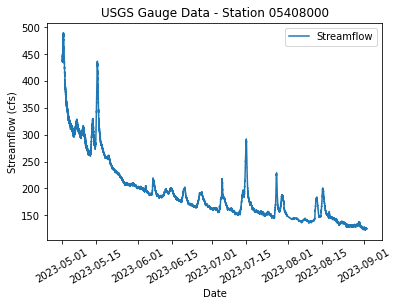

In [8]:
#USGS Flows From nearest USGS station: Kickapoo @ LaFarge

# Specify the USGS gauge station code and the period of interest
station_code = '05408000' 
start_date = '2023-05-01'
end_date = '2023-09-01'

# Use the nwis class to retrieve daily streamflow data for the specified station
data = nwis.get_record(sites=station_code, service='iv', start=start_date, end=end_date, parameterCd='00060')
data.index = pd.to_datetime(data.index)
# Plot the streamflow data
plt.plot(data.index, data['00060'], label='Streamflow')
plt.xlabel('Date')
plt.ylabel('Streamflow (cfs)')
plt.title(f'USGS Gauge Data - Station {station_code}')
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [6]:
#get la farge data from same time as flowtracker observation and convert from cfs to cms

lafarge_cms_observation = data.loc['6/22/2023 16:00']['00060']*.028316847 

#divide boundary flowtracker flow by la farge flow to get the proportion

hayesup_proportion = HayesUp_cms/lafarge_cms_observation
hayesup_proportion

0.07229119907062434

In [7]:
#reading in uncorrected heatsource flow files

source_folder = r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files'

os.chdir(source_folder)  # Change the current working directory

boundary_file = pd.read_csv(os.path.join(source_folder, 'inputs\WFK23_boundary.csv')).copy()
boundary_file

,DATETIME,INFLOW,TEMPERATURE
0,7/1/2023 0:00,0.348,20.817
1,7/1/2023 1:00,0.348,20.484
2,7/1/2023 2:00,0.348,20.150
3,7/1/2023 3:00,0.348,19.841
4,7/1/2023 4:00,0.348,19.484
...,...,...,...
740,7/31/2023 20:00,0.348,23.232
741,7/31/2023 21:00,0.348,22.202
742,7/31/2023 22:00,0.348,21.246
743,7/31/2023 23:00,0.348,20.460


In [13]:
data

,00060,00060_cd,site_no
datetime,,,
2023-05-01 05:00:00+00:00,437.0,A,05408000
2023-05-01 05:05:00+00:00,437.0,A,05408000
2023-05-01 05:10:00+00:00,439.0,A,05408000
2023-05-01 05:15:00+00:00,437.0,A,05408000
2023-05-01 05:20:00+00:00,440.0,A,05408000
...,...,...,...
2023-09-02 04:35:00+00:00,125.0,A,05408000
2023-09-02 04:40:00+00:00,124.0,A,05408000
2023-09-02 04:45:00+00:00,125.0,A,05408000


In [9]:
boundary_file.iloc[1]['DATETIME']

'7/1/2023 1:00'

In [12]:
#getting lafarge flow from day we are trying to model, applying the proportion between hayes flowtracker and lafarge gage

lafarge_proportion_modeled = (data.loc[boundary_file.iloc[1]['DATETIME']]['00060']*.028316847)*hayesup_proportion

lafarge_proportion_modeled
boundary_file['INFLOW'] = lafarge_proportion_modeled
boundary_file

#choose where to write csv
#boundary_file.to_csv(os.path.join(source_folder, 'inputs\WFK23_boundary_correctedflow.csv'))
# daily_mean_cms['hayes_correction'] = daily_mean_cms['00060']*hayesup_proportion
# daily_mean_cms['hayes_correction_factor'] = daily_mean_cms['hayes_correction']/0.348

,DATETIME,INFLOW,TEMPERATURE
0,7/1/2023 0:00,0.331624,20.817
1,7/1/2023 1:00,0.331624,20.484
2,7/1/2023 2:00,0.331624,20.150
3,7/1/2023 3:00,0.331624,19.841
4,7/1/2023 4:00,0.331624,19.484
...,...,...,...
740,7/31/2023 20:00,0.331624,23.232
741,7/31/2023 21:00,0.331624,22.202
742,7/31/2023 22:00,0.331624,21.246
743,7/31/2023 23:00,0.331624,20.460


In [18]:
data

,00060,00060_cd,site_no
datetime,,,
2023-05-01 05:00:00+00:00,437.0,A,05408000
2023-05-01 05:05:00+00:00,437.0,A,05408000
2023-05-01 05:10:00+00:00,439.0,A,05408000
2023-05-01 05:15:00+00:00,437.0,A,05408000
2023-05-01 05:20:00+00:00,440.0,A,05408000
...,...,...,...
2023-09-02 04:35:00+00:00,125.0,A,05408000
2023-09-02 04:40:00+00:00,124.0,A,05408000
2023-09-02 04:45:00+00:00,125.0,A,05408000


In [49]:
# applying offset to all tribs in the same run

#getting trib file names
def get_files_with_trib(folder_path):
    # Initialize an empty list to store file names
    file_names = []
    
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the filename contains 'trib'
        if 'trib' in filename and 'accretion' not in filename:
            # Add the filename to the list
            file_names.append(filename)
    
    return file_names

# Example usage
folder_path = os.path.join(source_folder, 'inputs')
file_names = get_files_with_trib(folder_path)
print(file_names)

['bloomtrib.csv', 'boydtrib.csv', 'halltrib.csv', 'hayestrib.csv', 'hwy82downtrib.csv', 'hwy82uptrib.csv', 'mayertrib.csv', 'riverrdtrib.csv', 'rockyruntrib.csv', 'seasbranchtrib.csv', 'smarthallowtrib.csv', 'thnorthtrib.csv', 'yodertrib.csv']


In [50]:
# applying correction to all trib values and writing new ones
for i in file_names:
    file = os.path.join(source_folder,'inputs', i)
    print(file)
    #csv = pd.read_csv(file).copy()
    #csv.index = pd.to_datetime(csv['DATETIME'])
    #result = csv.merge(daily_mean_cms, how='left', left_index=True, right_index=True)
    csv['FLOW1'] = csv['FLOW1']*lafarge_proportion_modeled
    csv.to_csv(str(file[:-4] + '_flowcorrected.csv'), index = False)
    #print(csv)

D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\bloomtrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\boydtrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\halltrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\hayestrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\hwy82downtrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\hwy82uptrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\mayertrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\july_calibration\monthly_cal\hs_files\inputs\riverrdtrib.csv
D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\runs\

In [47]:
#applying correction to accretion values

accretion = pd.read_csv(os.path.join('inputs', 'WFK23_accretion_notrib.csv'))
#csv.index = pd.to_datetime(csv['DATETIME'])
#result = csv.merge(daily_mean_cms, how='left', left_index=True, right_index=True)
accretion['INFLOW'] = accretion['INFLOW']*lafarge_proportion_modeled
print(accretion)
accretion.to_csv(os.path.join('inputs', str(file[:-4]+ '_flowcorrected.csv')), index = False)

     STREAM_ID  NODE_ID  STREAM_KM    INFLOW  TEMPERATURE  OUTFLOW
0          NaN      NaN       19.2  0.000000     11.90378      NaN
1          NaN      NaN       19.1  0.000000     11.90378      NaN
2          NaN      NaN       19.0  0.000000     11.90378      NaN
3          NaN      NaN       18.9  0.000000     11.90378      NaN
4          NaN      NaN       18.8  0.000000     11.90378      NaN
..         ...      ...        ...       ...          ...      ...
188        NaN      NaN        0.4  0.000013     11.90378      NaN
189        NaN      NaN        0.3  0.000241     11.90378      NaN
190        NaN      NaN        0.2  0.000649     11.90378      NaN
191        NaN      NaN        0.1  0.000044     11.90378      NaN
192        NaN      NaN        0.0  0.000034     11.90378      NaN

[193 rows x 6 columns]
